# Block Release
# story 2

As a student safety coordinator, I want a comparison of the distributions of crime in <br>
January 2023 within 1 mile of University Park campus, 1 mile of Jubilee Campus, and 1 mile <br>
of Nottingham city centre so that I can inform students of their risks in different areas.

## Imports

In [21]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

## Locations

In [22]:
# coordinates are latitude, longitude pairs
LOCATION_UNIVERSITY_PARK = (52.93726647677705, -1.1959384006396074)
LOCATION_JUBILEE_CAMPUS = (52.95232635429298, -1.1862643609249397)
LOCATION_NOTTINGHAM_CITY_CENTRE = (52.953, -1.149)

## API

You will need to add more API URLs here as needed to complete the stories.

In [36]:
API_STREET_CRIME = "https://data.police.uk/api/crimes-street/"

## Crimes Near University Park Campus

Example function which calculates the number of crimes within 1 mile of University Park campus.

In [37]:
def count_crimes_within_1_mile(
    lat: float, lon: float, year: int, month: int
) -> int:
    """Calculate number of crimes within 1 mile of a location for a date.

    Args:
        lat (float): Latitude of the location.
        lon (float): Longitude of the location.
        year (int): Year to find crimes.
        month (int): Month of the provided year to find crimes.

    Returns:
        int: Count of the crimes
    """
    url = (
        API_STREET_CRIME + f"all-crime?lat={lat}&lng={lon}&date={year}-{month}"
    )
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error retrieving data: {response.status_code}")

In [61]:
#listing out the different categories of crime for university part
categories_university_park=[]
for item in count_crimes_within_1_mile(*LOCATION_UNIVERSITY_PARK, 2023, 1):
    categories_university_park.append(item["category"])

In [62]:
#counting the occurences of each category for university park
category_counts_university_park={}
for category in categories_university_park:
    if category in category_counts_university_park:
        category_counts_university_park[category]+=1
    else:
        category_counts_university_park[category]=1

In [63]:
#repeating the above steps for jubilee campus and nottingham city centre
#jubilee campus
categories_jubilee_campus=[]
for item in count_crimes_within_1_mile(*LOCATION_JUBILEE_CAMPUS, 2023, 1):
    categories_jubilee_campus.append(item["category"])
category_counts_jubilee_campus={}
for category in categories_jubilee_campus:
    if category in category_counts_jubilee_campus:
        category_counts_jubilee_campus[category]+=1
    else:
        category_counts_jubilee_campus[category]=1
# nottingham city centre
categories_nottingham_city_centre=[]
for item in count_crimes_within_1_mile(*LOCATION_NOTTINGHAM_CITY_CENTRE, 2023, 1):
    categories_nottingham_city_centre.append(item["category"])
category_counts_nottingham_city_centre={}
for category in categories_nottingham_city_centre:
    if category in category_counts_nottingham_city_centre:
        category_counts_nottingham_city_centre[category]+=1
    else:
        category_counts_nottingham_city_centre[category]=1

Text(0.5, 1.0, 'Frequency of different categories of crime in University Park for Jan-2023')

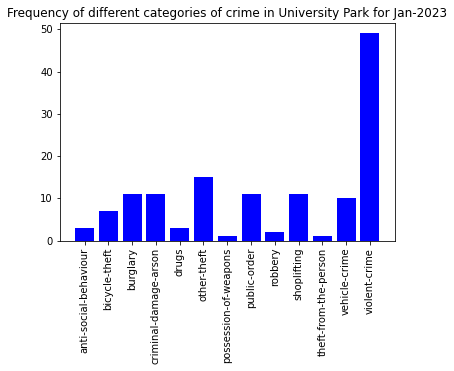

In [70]:
#plots
#University park
plt.bar(category_counts_university_park.keys(),category_counts_university_park.values(),color='blue')
plt.xticks(rotation='vertical')
plt.title("Frequency of different categories of crime in University Park for Jan-2023")

Text(0.5, 1.0, 'Frequency of different categories of crime in Jubilee Campus for Jan-2023')

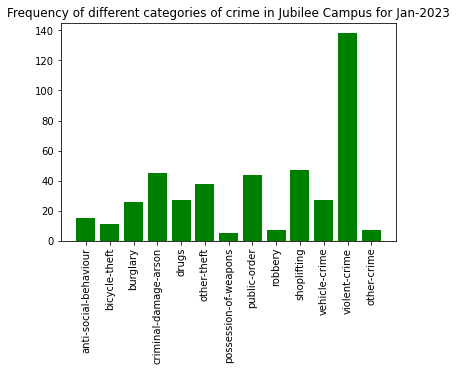

In [71]:
#Jubilee campus
plt.bar(category_counts_jubilee_campus.keys(),category_counts_jubilee_campus.values(),color='green')
plt.xticks(rotation='vertical')
plt.title("Frequency of different categories of crime in Jubilee Campus for Jan-2023")

Text(0.5, 1.0, 'Frequency of different categories of crime in Nottingham city centre for Jan-2023')

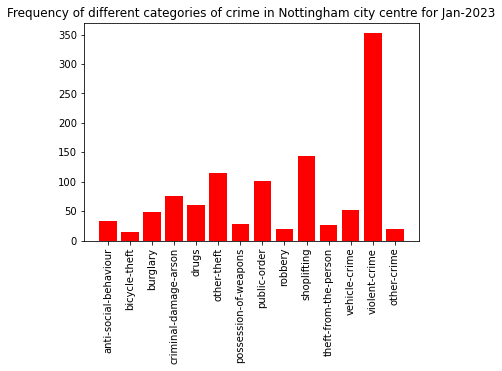

In [72]:
#Nottingham City centre
plt.bar(category_counts_nottingham_city_centre.keys(),category_counts_nottingham_city_centre.values(),color='red')
plt.xticks(rotation='vertical')
plt.title("Frequency of different categories of crime in Nottingham city centre for Jan-2023")